<a href="https://colab.research.google.com/github/Edudeiko/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module2-sampling-confidence-intervals-and-hypothesis-testing/Evgenii_Dudeiko_DSPT3_132_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# TODO - your code!
cv_data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data'

In [0]:
import pandas as pd
cv_data = pd.read_csv(cv_data_url)

In [0]:
import numpy as np
from scipy.stats import chisquare
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

In [117]:
cv_data.head()

,republican,n,y,n.1,y.1,y.2,y.3,n.2,n.3,n.4,y.4,?,y.5,y.6,y.7,n.5,y.8
0,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
1,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
2,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
3,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y
4,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y


In [118]:
cv_data.shape

(434, 17)

In [119]:
column_headers = ['Class Name', 'handicapped-infants', 
                  'water-project-cost-sharing', 
                  'adoption-of-the-budget-resolution', 'physician-fee-freeze', 
                  'el-salvador-aid', 'religious-groups-in-schools', 
                  'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 
                  'mx-missile', 'immigration', 'synfuels-corporation-cutback',
                  'education-spending', 'superfund-right-to-sue', 'crime',
                  'duty-free-exports', 'export-administration-act-south-africa']

df = pd.read_csv(cv_data_url, names=column_headers)
print(df.shape)
df.head()

(435, 17)


,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [0]:
df = df.replace(to_replace='?', value=np.NaN)

In [0]:
df = df.replace(('y', 'n'), (1, 0))

In [0]:
df = df.set_index('Class Name')

In [123]:
df.head()

,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
Class Name,,,,,,,,,,,,,,,,
republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
df = df.apply(lambda x: x.fillna(x.mean())) 

In [0]:
df = df.reset_index()

In [126]:
df.head()

,Class Name,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,0.362319,1.000000,1.0,1.0,0.0,1.000000
1,republican,0.00000,1.0,0.0,1.000000,1.000000,1.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.0,1.0,0.0,0.812689
2,democrat,0.44208,1.0,1.0,0.417453,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,1.0,0.0,0.000000
3,democrat,0.00000,1.0,1.0,0.000000,0.504762,1.0,0.0,0.0,0.0,0.0,1.000000,0.000000,1.0,0.0,0.0,1.000000
4,democrat,1.00000,1.0,1.0,0.000000,1.000000,1.0,0.0,0.0,0.0,0.0,1.000000,0.423267,1.0,1.0,1.0,1.000000


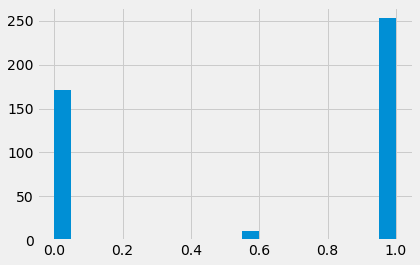

In [128]:
df['adoption-of-the-budget-resolution'].hist(bins=20);

In [129]:
df['adoption-of-the-budget-resolution'].value_counts()

1.000000    253
0.000000    171
0.596698     11
Name: adoption-of-the-budget-resolution, dtype: int64

In [130]:
df['adoption-of-the-budget-resolution'].mean()

0.5966981132075471

In [0]:
# Generate and numerically represent a confidence interval

In [0]:
def confidence_interval(data, confidence=0.95):
  data = np.array(df['adoption-of-the-budget-resolution'])
  mean = np.mean(df['adoption-of-the-budget-resolution'])
  n = len(df['adoption-of-the-budget-resolution'])
  stderr = stats.sem(df['adoption-of-the-budget-resolution'])
  t = stats.t.ppf((1 + confidence) / 2.0, n - 1)
  interval = stderr * t
  return (mean, mean - interval, mean + interval)

In [132]:
sample_size = 435
sample = df['adoption-of-the-budget-resolution'].sample(sample_size)
sample.head()

385    0.0
2      1.0
54     1.0
173    0.0
5      1.0
Name: adoption-of-the-budget-resolution, dtype: float64

In [133]:
sample_mean = sample.mean()
sample_std = np.std(sample, ddof=1)
print(sample_mean, sample_std)

0.5966981132075471 0.4848758151584321


In [134]:
standard_error = sample_std/np.sqrt(sample_size)
standard_error

0.023248015914627874

In [135]:
# t = 1.984 # 95% confidence
(sample_mean, sample_mean - t*standard_error, sample_mean + t*standard_error)

(0.5966981132075471, 0.5505740496329253, 0.6428221767821688)

In [136]:
confidence_interval(sample, confidence=0.95)

(0.5966981132075471, 0.5510054150917897, 0.6423908113233044)

In [0]:
# Graphically (with a plot) represent the confidence interval

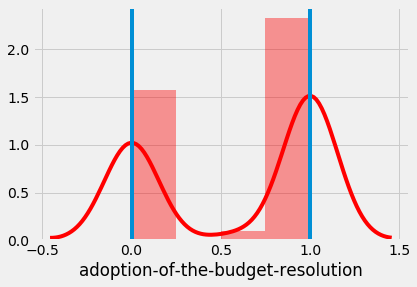

In [137]:
style.use('fivethirtyeight')

ax = sns.distplot(sample, color='r');
ax.axvline(np.percentile(sample,97.5),0);
ax.axvline(np.percentile(sample,2.5),0);

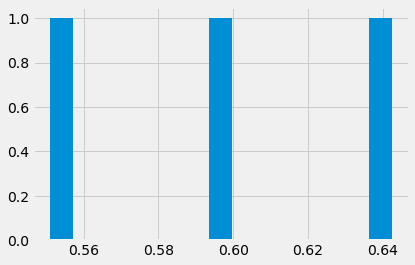

In [138]:
plt.hist(confidence_interval(sample, confidence=0.95), bins=15);
plt.grid(True)

In [0]:
# Interpret the confidence interval - what does it tell you about the data and its distribution?

In [185]:
df_2 = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df_2.head()

(32561, 16)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [0]:
# Chi-squared tests:
# Take a dataset that we have used in the past in class that has categorical variables. Pick two of those categorical variables and run a chi-squared tests on that data
# By hand using Numpy
# In a single line using Scipy

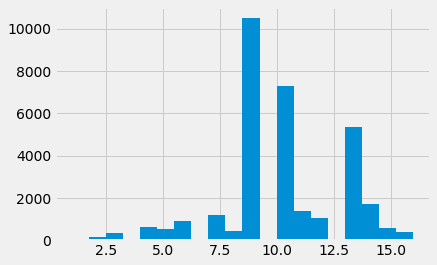

In [186]:
df_2['education-num'].hist(bins=20);

In [198]:
df_2.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary,education-num_categories
count,30725,32561,32561,30718,32561,32561,32561,31978,32561,32561
unique,8,16,7,14,6,2,2,41,2,6
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,True,Male,United-States,<=50K,12-14
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720,18336


In [199]:
cut_points = [0, 9, 19, 29, 39, 49, 500]
label_names = ['0-2','3-5','6-8','9-11','12-14','15+']
df_2['education-num_categories'] = pd.cut(df_2['hours-per-week'], cut_points, labels=label_names)
df_2['education-num_categories'].value_counts()

12-14    18336
15+       6462
9-11      3667
6-8       2392
3-5       1246
0-2        458
Name: education-num_categories, dtype: int64

In [200]:
df_2['race'].value_counts()

True     27816
False     4745
Name: race, dtype: int64

In [0]:
df_2['race'] = df_2['race'].str.contains('White')

In [0]:
# df_2[df_2['race'] != ' White'] & [df_2['race'] == ' White']


In [202]:
df_2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,education-num_categories
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,True,Male,2174,0,40,United-States,<=50K,12-14
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,True,Male,0,0,13,United-States,<=50K,3-5
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,True,Male,0,0,40,United-States,<=50K,12-14
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,False,Male,0,0,40,United-States,<=50K,12-14
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,False,Female,0,0,40,Cuba,<=50K,12-14


In [0]:
df = df.sort_values(by='education-num_categories')

In [207]:
contingency_table = pd.crosstab(df_2['race'], df_2['education-num_categories'], margins=True)
contingency_table

education-num_categories,0-2,3-5,6-8,9-11,12-14,15+,All
race,,,,,,,
False,55,139,387,669,2950,545,4745
True,403,1107,2005,2998,15386,5917,27816
All,6462,1246,18336,3667,458,2392,32561


In [208]:
row_sums = contingency_table.iloc[0:2, 6].values
col_sums = contingency_table.iloc[2, 0:6].values

print(row_sums)
print(col_sums)

[ 4745 27816]
[ 6462  1246 18336  3667   458  2392]


In [209]:
total = contingency_table.loc['All', 'All']
total

32561

In [210]:
expected = []
for row_sum in row_sums:
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sum/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
expected = np.array(expected)
print(expected.shape)
print(expected)

(2, 6)
[[  941.68453057   181.57519732  2672.04078499   534.3790117
     66.74272903   348.57774638]
 [ 5520.31546943  1064.42480268 15663.95921501  3132.6209883
    391.25727097  2043.42225362]]


In [213]:
observed = pd.crosstab(df_2['race'], df_2['education-num_categories']).values
print(observed.shape)
observed

(2, 6)


array([[   55,   139,   387,   669,  2950,   545],
       [  403,  1107,  2005,  2998, 15386,  5917]])

In [214]:
chi_square = ((observed - expected)**2/(expected)).sum()
chi_square

726169.9002143623

In [215]:
chi_squared, p_value, dof, expected = stats.chi2_contingency(observed)
print(chi_squared, p_value, dof, expected)

288.2166726722662 3.41550397024896e-60 5 [[   66.74272903   181.57519732   348.57774638   534.3790117
   2672.04078499   941.68453057]
 [  391.25727097  1064.42480268  2043.42225362  3132.6209883
  15663.95921501  5520.31546943]]


## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)